# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다. 
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 : 
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다. 
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ... 
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [353]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [354]:
# from google.colab import drive
# drive.mount('/content/drive')

In [355]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [356]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (3) 데이터 불러오기
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv

#### 1) 데이터로딩

In [358]:
file1 = 'open_data.csv'
file2 = 'weather.csv'

In [359]:
# read_csv를 활용
open_date = pd.read_csv(file1)
weather = pd.read_csv(file2)

In [360]:
display(open_date.head(2))
display(weather.head(2))

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611


,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16


In [361]:
print(open_date.info())
print("="*80)
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     2922 non-null   object 
 1   차량운행    2922 non-null   int64  
 2   접수건     2922 non-null   int64  
 3   탑승건     2922 non-null   int64  
 4   평균대기시간  2922 non-null   float64
 5   평균요금    2922 non-null   int64  
 6   평균승차거리  2922 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 159.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4018 non-null   object 
 1   temp_max         4018 non-null   float64
 2   temp_min         4018 non-null   float64
 3   rain(mm)         4018 non-null   float64
 4   humidity_max(%)  4018 non-null   float64
 5   humidity_min(%)  4018 non-null   float64
 6   sunshine(MJ/m

In [362]:
# to_datetime 활용, '기준일' 컬럼 타입 변경
open_date['기준일'] = pd.to_datetime(open_date['기준일'])

#### 2) 기본 정보 조회

In [363]:
#전체 데이터의 행,열 개수 확인
print(open_date.shape)
print(weather.shape)

(2922, 7)
(4018, 7)


In [364]:
#전체 데이터의 모든 변수 확인
print(open_date.info())
print("="*80)
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     2922 non-null   datetime64[ns]
 1   차량운행    2922 non-null   int64         
 2   접수건     2922 non-null   int64         
 3   탑승건     2922 non-null   int64         
 4   평균대기시간  2922 non-null   float64       
 5   평균요금    2922 non-null   int64         
 6   평균승차거리  2922 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 159.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4018 non-null   object 
 1   temp_max         4018 non-null   float64
 2   temp_min         4018 non-null   float64
 3   rain(mm)         4018 non-null   float64
 4   humidity_max(%)  4018 non-null   fl

#### 3) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.

In [365]:
# 컬럼 명으로 'Date','car_cnt','request_cnt','ride_cnt','waiting_time','fare','distance' 추천
open_date.columns = ['Date','car_cnt','request_cnt','ride_cnt','waiting_time','fare','distance']

In [366]:
open_date.head(2)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611


## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.

In [367]:
# dt.weekday, dt.month, dt.week, dt.year 활용
open_date['year'] = open_date['Date'].dt.year
open_date['month'] = open_date['Date'].dt.month
open_date['week'] = open_date['Date'].dt.week
open_date['weekday'] = open_date['Date'].dt.weekday

# 출력해서 확인
open_date.head(2)

C:\Users\user\AppData\Local\Temp\ipykernel_25108\3926760895.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  open_date['week'] = open_date['Date'].dt.week


,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,3
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,4


### (2) 일별 (lineplot 활용)

* 차량 운행수

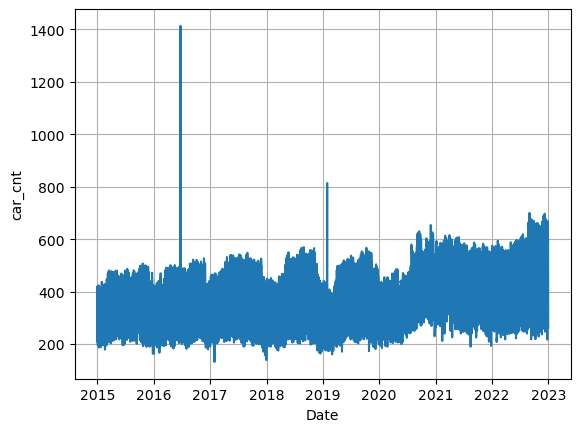

In [368]:
sns.lineplot(x='Date', y='car_cnt', data=open_date)
plt.xlabel("Date")
plt.ylabel("car_cnt")
plt.grid()
plt.show()

* 접수건, 탑승건

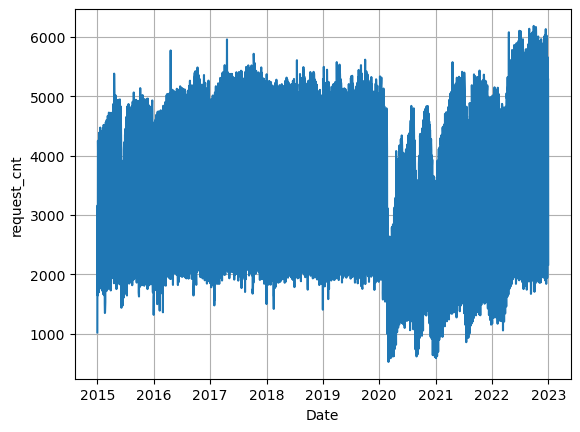

In [369]:
sns.lineplot(x='Date', y='request_cnt', data=open_date)
plt.xlabel("Date")
plt.ylabel("request_cnt")
plt.grid()
plt.show()

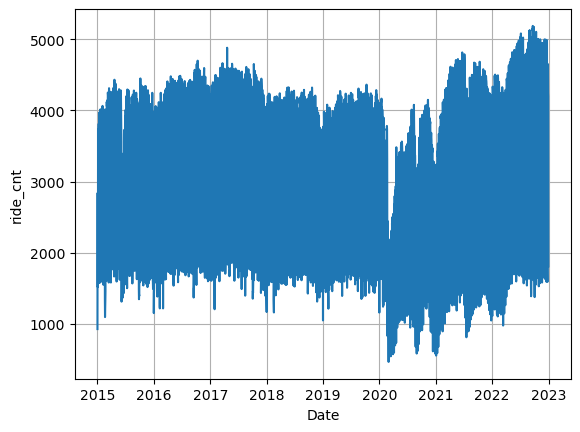

In [370]:
sns.lineplot(x='Date', y='ride_cnt', data=open_date)
plt.xlabel("Date")
plt.ylabel("ride_cnt")
plt.grid()
plt.show()

* 대기시간

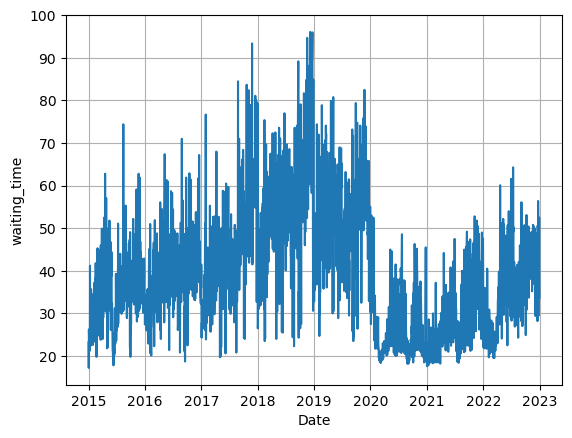

In [371]:
sns.lineplot(x='Date', y='waiting_time', data=open_date)
plt.xlabel("Date")
plt.ylabel("waiting_time")
plt.grid()
plt.show()

* 운임

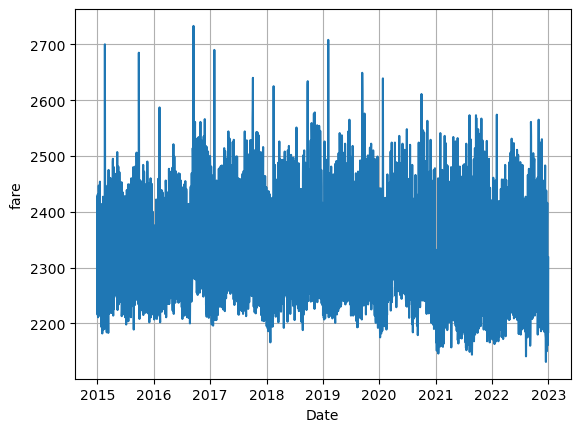

In [372]:
sns.lineplot(x='Date', y='fare', data=open_date)
plt.xlabel("Date")
plt.ylabel("fare")
plt.grid()
plt.show()

* 이동거리

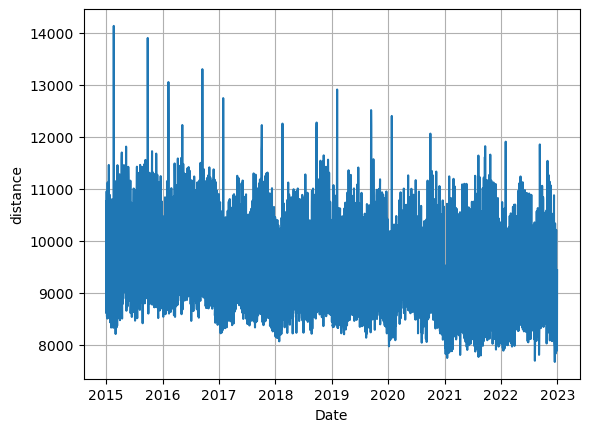

In [373]:
sns.lineplot(x='Date', y='distance', data=open_date)
plt.xlabel("Date")
plt.ylabel("distance")
plt.grid()
plt.show()

### (3) 요일별 (boxplot활용)

* 차량 운행수

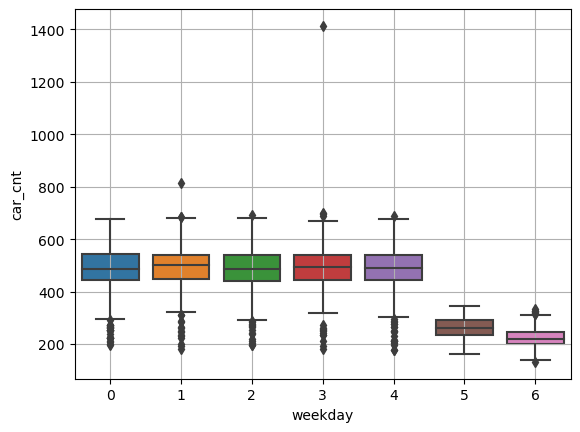

In [374]:
sns.boxplot(x='weekday', y='car_cnt', data=open_date)
plt.xlabel("weekday")
plt.ylabel("car_cnt")
plt.grid()
plt.show()

* 접수건, 탑승건

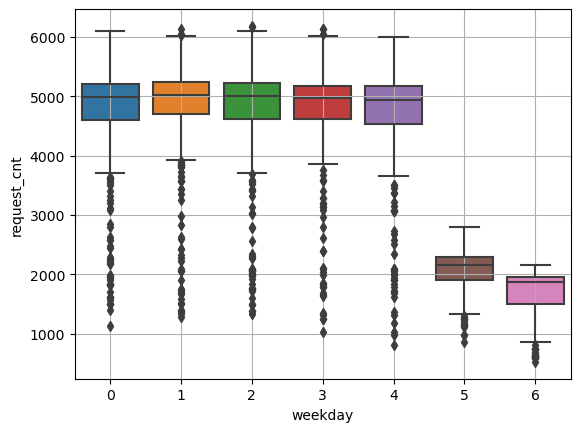

In [375]:
sns.boxplot(x='weekday', y='request_cnt', data=open_date)
plt.xlabel("weekday")
plt.ylabel("request_cnt")
plt.grid()
plt.show()

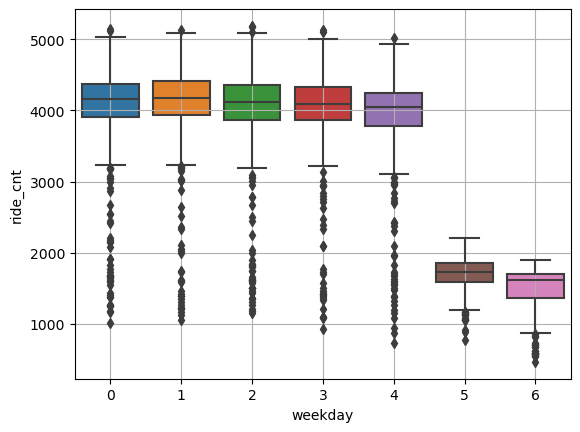

In [376]:
sns.boxplot(x='weekday', y='ride_cnt', data=open_date)
plt.xlabel("weekday")
plt.ylabel("ride_cnt")
plt.grid()
plt.show()

* 대기시간

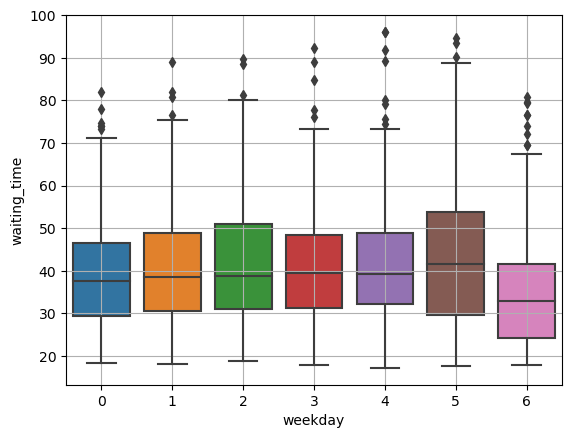

In [377]:
sns.boxplot(x='weekday', y='waiting_time', data=open_date)
plt.xlabel("weekday")
plt.ylabel("waiting_time")
plt.grid()
plt.show()

* 운임

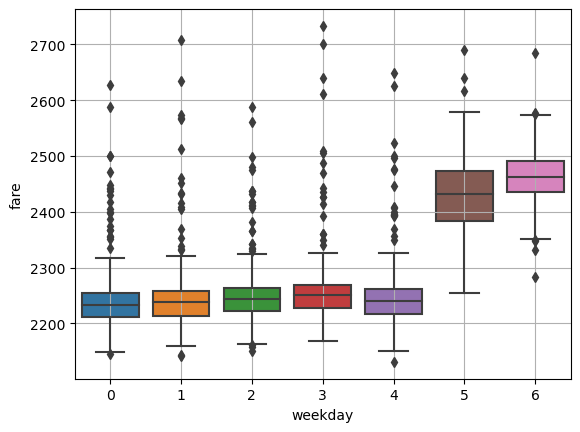

In [378]:
sns.boxplot(x='weekday', y='fare', data=open_date)
plt.xlabel("weekday")
plt.ylabel("fare")
plt.grid()
plt.show()

* 이동거리

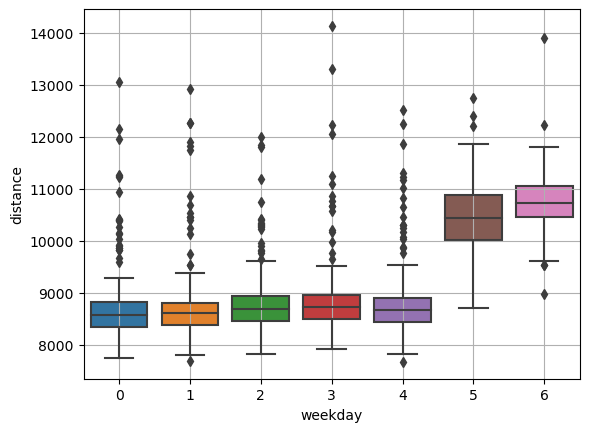

In [379]:
sns.boxplot(x='weekday', y='distance', data=open_date)
plt.xlabel("weekday")
plt.ylabel("distance")
plt.grid()
plt.show()

### (4) 월별 (boxplot활용)

* 차량 운행수

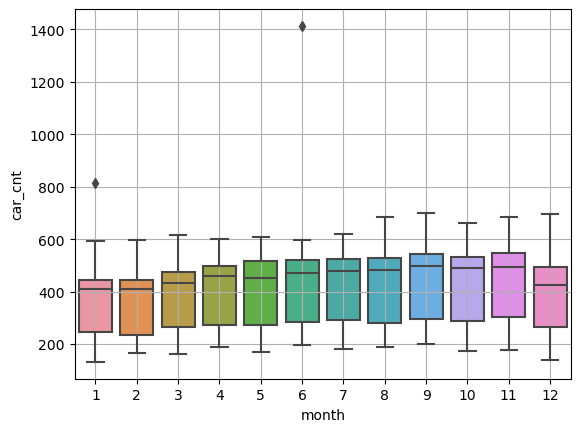

In [380]:
sns.boxplot(x='month', y='car_cnt', data=open_date)
plt.xlabel("month")
plt.ylabel("car_cnt")
plt.grid()
plt.show()

* 접수건, 탑승건

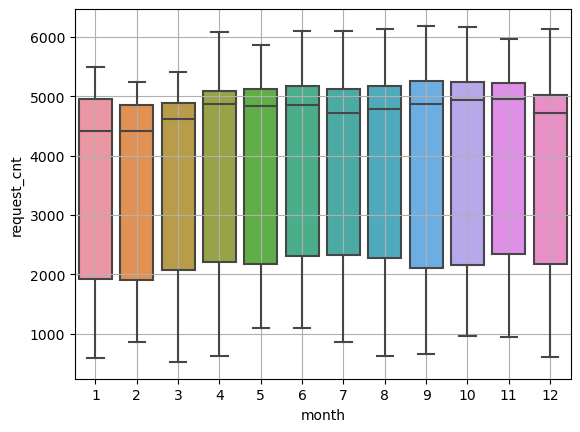

In [381]:
sns.boxplot(x='month', y='request_cnt', data=open_date)
plt.xlabel("month")
plt.ylabel("request_cnt")
plt.grid()
plt.show()

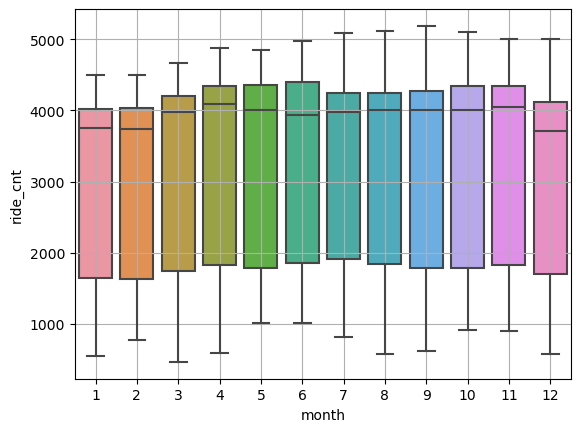

In [382]:
sns.boxplot(x='month', y='ride_cnt', data=open_date)
plt.xlabel("month")
plt.ylabel("ride_cnt")
plt.grid()
plt.show()

* 대기시간

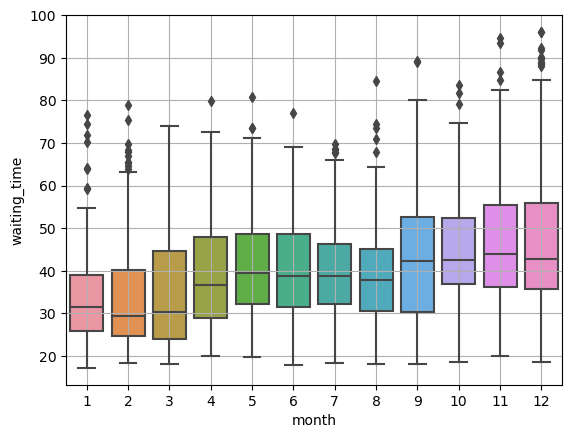

In [383]:
sns.boxplot(x='month', y='waiting_time', data=open_date)
plt.xlabel("month")
plt.ylabel("waiting_time")
plt.grid()
plt.show()

* 운임

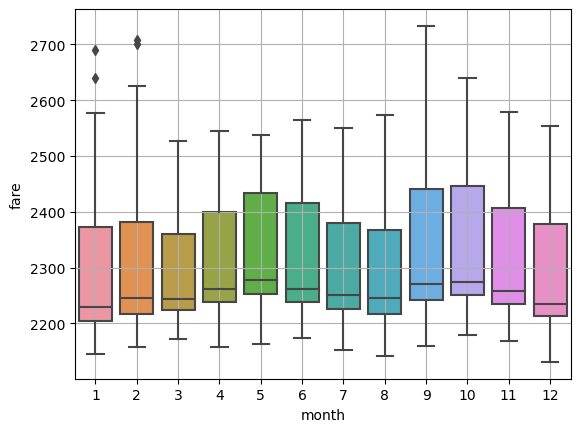

In [384]:
sns.boxplot(x='month', y='fare', data=open_date)
plt.xlabel("month")
plt.ylabel("fare")
plt.grid()
plt.show()

* 이동거리

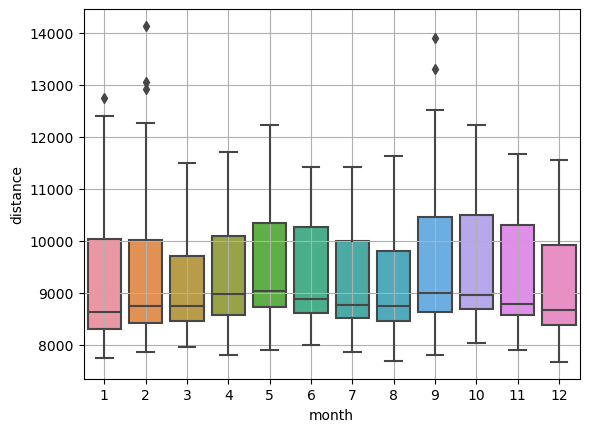

In [385]:
sns.boxplot(x='month', y='distance', data=open_date)
plt.xlabel("month")
plt.ylabel("distance")
plt.grid()
plt.show()

### (5) 연도별 (boxplot 활용)

* 차량 운행수

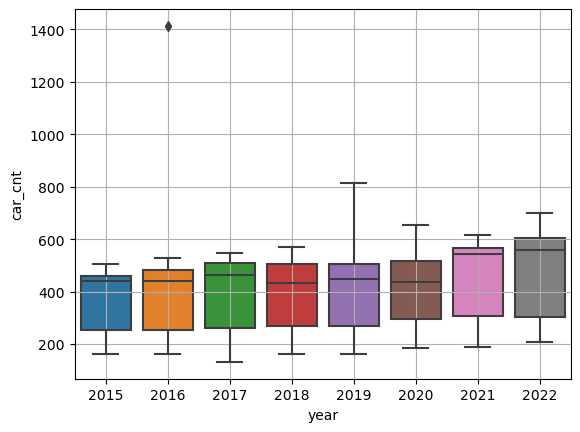

In [386]:
sns.boxplot(x='year', y='car_cnt', data=open_date)
plt.xlabel("year")
plt.ylabel("car_cnt")
plt.grid()
plt.show()

* 접수건, 탑승건

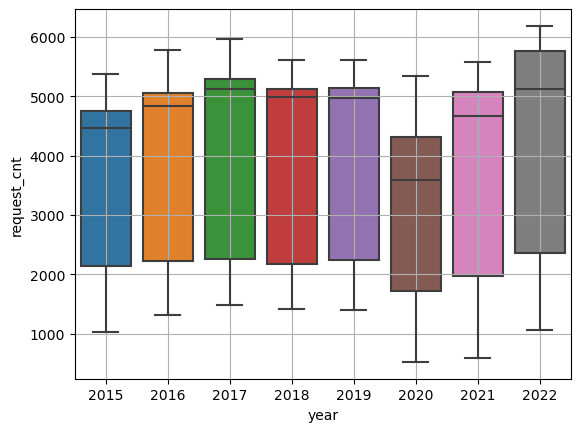

In [387]:
sns.boxplot(x='year', y='request_cnt', data=open_date)
plt.xlabel("year")
plt.ylabel("request_cnt")
plt.grid()
plt.show()

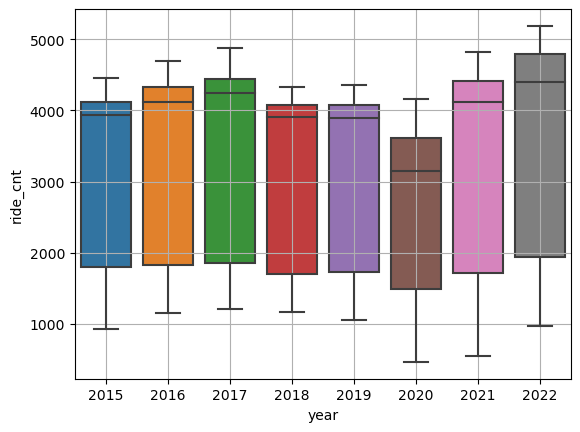

In [388]:
sns.boxplot(x='year', y='ride_cnt', data=open_date)
plt.xlabel("year")
plt.ylabel("ride_cnt")
plt.grid()
plt.show()

## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 : 
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

In [389]:
open_date

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,3
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,4
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,5
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,6
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,2022,12,52,1
2918,2022-12-28,607,5654,4648,44.8,2161,7882,2022,12,52,2
2919,2022-12-29,581,5250,4247,52.5,2229,8433,2022,12,52,3
2920,2022-12-30,600,5293,4200,38.3,2183,8155,2022,12,52,4


### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [390]:
open_date.set_index('Date', inplace=True)

In [391]:
# 익일의 대기시간(waiting time)을 오늘의 데이터를 활용하여 예측 해야하는 대상(target)으로 설정
open_date['yesterday_waiting_time'] = open_date['waiting_time'].shift(freq='-1D')
open_date.fillna(method='ffill', inplace=True)
open_date

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday,yesterday_waiting_time
Date,,,,,,,,,,,
2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,3,17.2
2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,4,26.2
2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,5,24.5
2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,6,26.2
2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,0,23.6
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,669,5635,4654,44.4,2198,8178,2022,12,52,1,44.8
2022-12-28,607,5654,4648,44.8,2161,7882,2022,12,52,2,52.5
2022-12-29,581,5250,4247,52.5,2229,8433,2022,12,52,3,38.3


In [392]:
open_date.reset_index(inplace=True)

### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

In [393]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [394]:
# 익일의 실제 날씨 데이터를 전일에 발표된 예보데이터로 판단
df = pd.merge(open_date, weather, on='Date', how='left')
df.head(2)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday,yesterday_waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,3,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,4,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07


### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


In [395]:
# 계절 정보를 추가
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['month'].apply(get_season)

In [396]:
df.head(2)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday,yesterday_waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Season
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,3,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79,Winter
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,4,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07,Winter


#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [397]:
# pip install workalendar
# pip install holidays

* 간단 사용법

In [398]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2015))

,0,1
0,2015-01-01,New year
1,2015-02-18,Korean New Year's Day
2,2015-02-19,Korean New Year's Day
3,2015-02-20,Korean New Year's Day
4,2015-03-01,Independence Day
5,2015-05-05,Children's Day
6,2015-05-25,Buddha's Birthday
7,2015-06-06,Memorial Day
8,2015-08-15,Liberation Day
9,2015-09-26,Midautumn Festival


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

In [399]:
# 대한민국 공휴일 정보 가져오기
cal = SouthKorea()

# 휴무일 데이터셋 만들기 (2015 ~ 2022)
holidays_data = []

for year in range(2015, 2023):
    holidays = cal.holidays(year)
    for date, name in holidays:
        holidays_data.append({'Date': date, 'HolidayName': 1})

holidays_df = pd.DataFrame(holidays_data)
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

In [400]:
df = pd.merge(df, holidays_df, how='left')

In [401]:
# 휴무일이 아닌 날은 'None' 또는 다른 값으로 채우기
df['HolidayName'].fillna(0, inplace=True)

In [402]:
df.head(2)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday,yesterday_waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Season,HolidayName
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,3,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79,Winter,1.0
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,4,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07,Winter,0.0


#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

In [403]:
# 이동 평균 계산 (창 크기 3)
df['rolling_mean'] = df['waiting_time'].rolling(window=7, min_periods=1, center=True).mean()

# 결과 확인
df.head(2)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,...,yesterday_waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Season,HolidayName,rolling_mean
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,...,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79,Winter,1.0,22.775
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,...,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07,Winter,0.0,23.460


#### 4) 탑승률
- 탑승률(%) = (탑승 승객 수 / 요청 승객 수) * 100

In [404]:
df['ride_rate'] = (df['ride_cnt'] / df['request_cnt']) * 100
df.head(2)
df.columns

Index(['Date', 'car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'year', 'month', 'week', 'weekday',
       'yesterday_waiting_time', 'temp_max', 'temp_min', 'rain(mm)',
       'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'Season',
       'HolidayName', 'rolling_mean', 'ride_rate'],
      dtype='object')

In [405]:
bins = [7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
labels = [f'{start}-{end}' for start, end in zip(bins[:-1], bins[1:])]
df['distance_category'] = pd.cut(df['distance'], bins=bins, labels=labels)

## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [406]:
# 데이터프레임을 joblib을 사용하여 저장
import joblib
file_name = 'data1.pkl'
joblib.dump(df, file_name)
print(f'DataFrame 저장이 완료되었습니다: {file_name}')

DataFrame 저장이 완료되었습니다: data1.pkl
